In [1]:
import pandas as pd

uniqlo_df = pd.read_csv('C:/Users/Murtuja afshar/OneDrive/Desktop/job/task 4/uniqlo_tshirts_cleaned_prices.csv')
levis_df = pd.read_csv('C:/Users/Murtuja afshar/OneDrive/Desktop/job/task 4/levi_products_cleaned_prices.csv')

In [2]:
uniqlo_df.head()

,Product Name,Price,Rating,Rating Count
0,AIRism Cotton Oversized T-Shirt | Half-Sleeve,$14.90,4.8,999
1,AIRism Cotton T-Shirt | Striped | Contrast Trim,$14.90,4.8,32
2,AIRism Cotton T-Shirt,$14.90,4.4,34
3,AIRism Cotton T-Shirt | V-Neck,$19.90,3.6,3
4,SUPIMAÂ® Cotton T-Shirt,$24.90,4.7,753


In [3]:
levis_df.head()

,Product Name,Price,Rating,Rating Count,Average_price
0,Levi'sÂ® Logo Classic T-Shirt,$24.50,4.3,422,24.50
1,Levi'sÂ® Sportswear Logo Graphic T-Shirt,Temporary Price Range is | $14.99 - $24.50 | O...,4.2,127,19.75
2,Classic Western Standard Fit Shirt,Temporary Price is | $48.65 | Original Price w...,4.4,466,59.08
3,Barstow Western Denim Shirt,Sale Price Range is | $53.98 - $79.50 | Origin...,4.3,369,66.74
4,Housemark Polo Shirt,Temporary Price is | $19.99 | Original Price w...,4.6,173,29.75


In [4]:
uniqlo_df['Price'] = uniqlo_df['Price'].replace('[\$,]', '', regex = True).astype(float)

print(uniqlo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  14 non-null     object 
 1   Price         14 non-null     float64
 2   Rating        14 non-null     float64
 3   Rating Count  14 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 576.0+ bytes
None


In [5]:
print(levis_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   36 non-null     object 
 1   Price          36 non-null     object 
 2   Rating         36 non-null     float64
 3   Rating Count   36 non-null     int64  
 4   Average_price  36 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ KB
None


In [6]:
print(uniqlo_df.describe())

           Price     Rating  Rating Count
count  14.000000  14.000000     14.000000
mean   19.257143   4.592857    255.571429
std     8.353784   0.345219    376.441581
min     7.900000   3.600000      3.000000
25%    14.900000   4.500000     12.500000
50%    17.400000   4.700000     33.500000
75%    24.900000   4.775000    327.500000
max    39.900000   5.000000    999.000000


In [7]:
print(levis_df.describe())

          Rating  Rating Count  Average_price
count  36.000000     36.000000      36.000000
mean    4.241667     97.000000      34.932500
std     0.421816    131.755835      16.282315
min     2.600000      1.000000      18.480000
25%     4.000000     12.750000      22.175000
50%     4.300000     37.500000      28.240000
75%     4.500000    104.000000      46.557500
max     5.000000    485.000000      69.500000


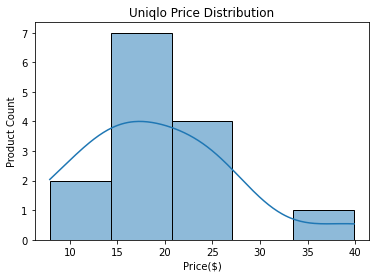

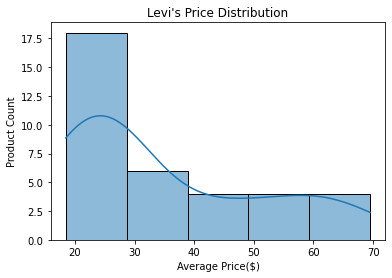

In [8]:
#visual data analysis
#Histogram

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(uniqlo_df['Price'] ,bins=5 ,kde=True)
plt.title('Uniqlo Price Distribution')
plt.xlabel('Price($)')
plt.ylabel('Product Count')
plt.show()

sns.histplot(levis_df['Average_price'] ,bins=5 ,kde=True)
plt.title("Levi's Price Distribution")
plt.xlabel('Average Price($)')
plt.ylabel('Product Count')
plt.show()

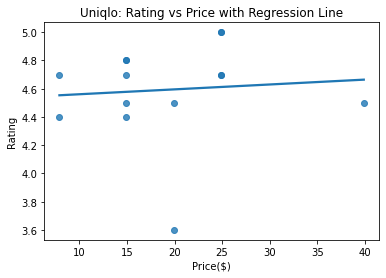

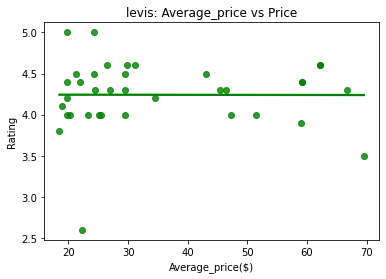

In [9]:
sns.regplot(data=uniqlo_df, x='Price', y='Rating', scatter=True, ci=None)
plt.title('Uniqlo: Rating vs Price with Regression Line')
plt.ylabel('Rating')
plt.xlabel('Price($)')
plt.show()

sns.regplot(data=levis_df, x='Average_price', y='Rating', scatter=True, ci=None, color='green')
plt.title('levis: Average_price vs Price')
plt.ylabel('Rating')
plt.xlabel('Average_price($)')
plt.show()

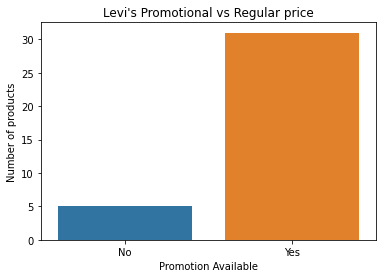

In [10]:
#calculating Promotions in Levi's dataset using Lambda
#countplot of promotion

levis_df['Promotion'] = levis_df['Price'].apply(lambda x: 'Yes' if 'Temporary' in str(x) or 'Sale' in str(x) else 'No')

sns.countplot(data=levis_df, x='Promotion')
plt.title("Levi's Promotional vs Regular price")
plt.xlabel('Promotion Available')
plt.ylabel('Number of products')
plt.show()

In [11]:
#clustering using K-means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#scaling data
levis_cluster_data = levis_df[['Average_price','Rating','Rating Count']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(levis_cluster_data)

#Kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
levis_df['cluster']=kmeans.fit_predict(scaled_data)

levis_df.head()

,Product Name,Price,Rating,Rating Count,Average_price,Promotion,cluster
0,Levi'sÂ® Logo Classic T-Shirt,$24.50,4.3,422,24.50,No,2
1,Levi'sÂ® Sportswear Logo Graphic T-Shirt,Temporary Price Range is | $14.99 - $24.50 | O...,4.2,127,19.75,Yes,1
2,Classic Western Standard Fit Shirt,Temporary Price is | $48.65 | Original Price w...,4.4,466,59.08,Yes,2
3,Barstow Western Denim Shirt,Sale Price Range is | $53.98 - $79.50 | Origin...,4.3,369,66.74,Yes,2
4,Housemark Polo Shirt,Temporary Price is | $19.99 | Original Price w...,4.6,173,29.75,Yes,1


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

uniqlo_cluster_data = uniqlo_df[['Price','Rating','Rating Count']]
scaler = StandardScaler()
scaled_data_2 = scaler.fit_transform(uniqlo_cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42)
uniqlo_df['cluster'] = kmeans.fit_predict(scaled_data_2)

uniqlo_df.head()

,Product Name,Price,Rating,Rating Count,cluster
0,AIRism Cotton Oversized T-Shirt | Half-Sleeve,14.9,4.8,999,0
1,AIRism Cotton T-Shirt | Striped | Contrast Trim,14.9,4.8,32,1
2,AIRism Cotton T-Shirt,14.9,4.4,34,1
3,AIRism Cotton T-Shirt | V-Neck,19.9,3.6,3,1
4,SUPIMAÂ® Cotton T-Shirt,24.9,4.7,753,0


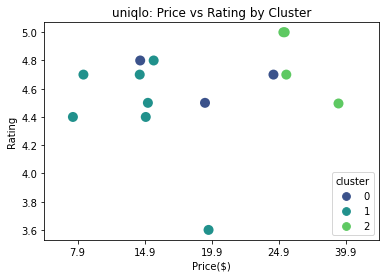

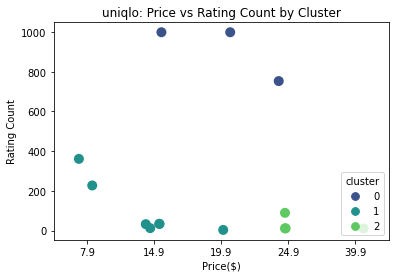

In [24]:
#visualization

sns.stripplot(data=uniqlo_df, x='Price', y='Rating', hue='cluster', palette='viridis', jitter=0.15, size=10)
plt.title('uniqlo: Price vs Rating by Cluster')
plt.xlabel('Price($)')
plt.ylabel('Rating')
plt.legend(title='cluster', loc='lower right')
plt.show()


sns.stripplot(data=uniqlo_df, x='Price', y='Rating Count', hue='cluster', palette='viridis', jitter=0.15, size=10)
plt.title('uniqlo: Price vs Rating Count by Cluster')
plt.xlabel('Price($)')
plt.ylabel('Rating Count')
plt.legend(title='cluster', loc='lower right')
plt.show()

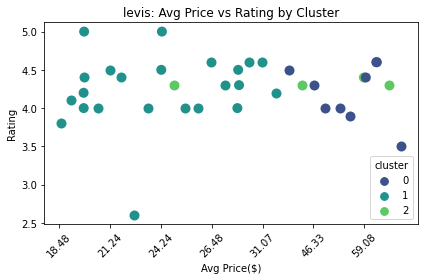

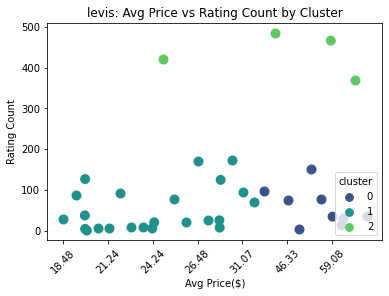

In [27]:
sns.stripplot(data=levis_df, x='Average_price', y='Rating', hue='cluster', palette='viridis', jitter=0.15, size=10)
plt.title('levis: Avg Price vs Rating by Cluster')
plt.xlabel('Avg Price($)')
plt.ylabel('Rating')
plt.legend(title='cluster', loc='lower right')
plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=8)
plt.tight_layout()
plt.show()


sns.stripplot(data=levis_df, x='Average_price', y='Rating Count', hue='cluster', palette='viridis', jitter=0.15, size=10)
plt.title('levis: Avg Price vs Rating Count by Cluster')
plt.xlabel('Avg Price($)')
plt.ylabel('Rating Count')
plt.legend(title='cluster', loc='lower right')
plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=8)
plt.show()